# Setup

In [1]:
# import your standard packages
%run ../../global-tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


## <font color='orange'>Parameters</font> 

In [2]:
# these are for grouping into the IOD years since the effects are 
# not confined to a single year. You chose this to have an even 
# number of months around the IOD peak..but now you left it in
# line with the SLA plots that start in 06 and end in 05
IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

AS_bounds = [68,79,4,20]
BoB_bounds = [87,100,0,23]


cbounds = [65,100,0,30]

## <font color='orange'>Functions</font> 

In [3]:
# change the sla data to get rid of the daily aspect and have month_time = time for future so you can use one function
# and add it to the external .py file. Also, make the rolling a function of IODyearbegin-1.

def IOD_year_group_area(invar,begin,end,IODyears):
    data= []
    space_data = []
    for ii,year in enumerate(IODyears):
        start_time = str(year) + begin
        end_time = str(year+1) + end
        time_slice = slice(start_time, end_time)
        sp_data = invar.sel(time=time_slice)
        area_avg = sp_data.stack(allpoints = ['lat','lon']).mean(dim='allpoints')
        data.append(area_avg)
        space_data.append(sp_data)
        
    # add all the data together
    data_concat = xr.concat(data, dim='time')
    # average
    # take the mean for each month of all the years
    data_mean = data_concat.groupby('time.month').mean(dim='time')
    #start in June instead of 01
    data_mean = data_mean.roll(month=-5,roll_coords = False)
        
    return data, data_mean, space_data

## <font color='orange'>Read Data</font> 

In [4]:
# get data from tigress
path = '../data/CHL/'
# infn = 'all_L3m_AV_CHL1_100km_global_monthly_merged_1997_2020_processed.nc'
infn = 'chl_4km_monthly_processed.nc'
ds_CHL = xr.open_dataset(path + infn)
# ds_CHL

# Subset ------------------------------------------------#

# Get data, selecting lat/lon slice
AS_lat_slice = slice(AS_bounds[2],AS_bounds[3]) 
AS_lon_slice = slice(AS_bounds[0],AS_bounds[1]) 
AS_mon_chl = ds_CHL['mon_chl'].sel(lat=AS_lat_slice,lon=AS_lon_slice)
AS_mon_chl_mon_anom = ds_CHL['mon_chl_mon_anom'].sel(lat=AS_lat_slice,lon=AS_lon_slice)
AS_chl_mon_clim = ds_CHL['chl_mon_clim'].sel(lat=AS_lat_slice,lon=AS_lon_slice)
AS_lat = AS_mon_chl_mon_anom.lat.values
AS_lon = AS_mon_chl_mon_anom.lon.values
AS_time = AS_mon_chl_mon_anom.time.values

BoB_lat_slice = slice(BoB_bounds[2],BoB_bounds[3]) # bounds inclusive
BoB_lon_slice = slice(BoB_bounds[0],BoB_bounds[1]) # bounds inclusiveAS_boun
BoB_mon_chl = ds_CHL['mon_chl'].sel(lat=BoB_lat_slice,lon=BoB_lon_slice)
BoB_mon_chl_mon_anom = ds_CHL['mon_chl_mon_anom'].sel(lat=BoB_lat_slice,lon=BoB_lon_slice)
BoB_chl_mon_clim = ds_CHL['chl_mon_clim'].sel(lat=BoB_lat_slice,lon=BoB_lon_slice)
BoB_lat = BoB_mon_chl_mon_anom.lat.values
BoB_lon = BoB_mon_chl_mon_anom.lon.values
BoB_time = BoB_mon_chl_mon_anom.time.values

n_BoB_lat_slice = slice(n_BoB_bounds[2],n_BoB_bounds[3]) # bounds inclusive
n_BoB_lon_slice = slice(n_BoB_bounds[0],n_BoB_bounds[1]) # bounds inclusiveAS_boun
n_BoB_mon_chl = ds_CHL['mon_chl'].sel(lat=n_BoB_lat_slice,lon=n_BoB_lon_slice)
n_BoB_mon_chl_mon_anom = ds_CHL['mon_chl_mon_anom'].sel(lat=n_BoB_lat_slice,lon=n_BoB_lon_slice)
n_BoB_chl_mon_clim = ds_CHL['chl_mon_clim'].sel(lat=n_BoB_lat_slice,lon=n_BoB_lon_slice)
n_BoB_lat = n_BoB_mon_chl_mon_anom.lat.values
n_BoB_lon = n_BoB_mon_chl_mon_anom.lon.values
n_BoB_time = n_BoB_mon_chl_mon_anom.time.values


s_BoB_lat_slice = slice(s_BoB_bounds[2],s_BoB_bounds[3]) # bounds inclusive
s_BoB_lon_slice = slice(s_BoB_bounds[0],s_BoB_bounds[1]) # bounds inclusiveAS_boun
s_BoB_mon_chl = ds_CHL['mon_chl'].sel(lat=s_BoB_lat_slice,lon=s_BoB_lon_slice)
s_BoB_mon_chl_mon_anom = ds_CHL['mon_chl_mon_anom'].sel(lat=s_BoB_lat_slice,lon=s_BoB_lon_slice)
s_BoB_chl_mon_clim = ds_CHL['chl_mon_clim'].sel(lat=s_BoB_lat_slice,lon=s_BoB_lon_slice)
s_BoB_lat = s_BoB_mon_chl_mon_anom.lat.values
s_BoB_lon = s_BoB_mon_chl_mon_anom.lon.values
s_BoB_time = s_BoB_mon_chl_mon_anom.time.values

## <font color='orange'>Group Into IOD Phases</font> 

In [5]:
# load DMI data
ds_DMI= xr.open_dataset('../data/DMI/dmi_processed.nc')
ds_DMI

posIODyears = list(np.array(ds_DMI.pos_IOD_years[(ds_DMI.pos_IOD_years >= 1997) & (ds_DMI.pos_IOD_years <=2019)]))
# posIODyears = [1997,2019]
negIODyears = list(np.array(ds_DMI.neg_IOD_years[(ds_DMI.neg_IOD_years >= 1997) & (ds_DMI.neg_IOD_years <=2019)]))
neuIODyears = list(np.array(ds_DMI.neu_IOD_years[(ds_DMI.neu_IOD_years >= 1997) & (ds_DMI.neu_IOD_years <=2019)]))
allyears = list(np.arange(1997,2020)) # ends on 2019

# identify boxes

In [6]:
var = AS_mon_chl
# ------------------------------------------------------------#
# Bin
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
AS_posIOD_mon_chl,AS_posIOD_mon_chl_mean,AS_posIOD_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
AS_negIOD_mon_chl,AS_negIOD_mon_chl_mean,AS_negIOD_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,negIODyears)

# average over the positive IOD years -------------------------------------------# 
AS_neuIOD_mon_chl,AS_neuIOD_mon_chl_mean,AS_neuIOD_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,neuIODyears)

# average over all years -------------------------------------------# 
AS_clim_mon_chl,AS_clim_mon_chl_mean,AS_clim_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,allyears)

var = BoB_mon_chl
# ------------------------------------------------------------#
# Bin
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
BoB_posIOD_mon_chl,BoB_posIOD_mon_chl_mean,BoB_posIOD_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
BoB_negIOD_mon_chl,BoB_negIOD_mon_chl_mean,BoB_negIOD_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,negIODyears)

# average over the positive IOD years -------------------------------------------# 
BoB_neuIOD_mon_chl,BoB_neuIOD_mon_chl_mean,BoB_neuIOD_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,neuIODyears)

# average over all years -------------------------------------------# 
BoB_clim_mon_chl,BoB_clim_mon_chl_mean,BoB_clim_mon_chl_sp = IOD_year_group_area(var,IODyear_begin,IODyear_end,allyears)

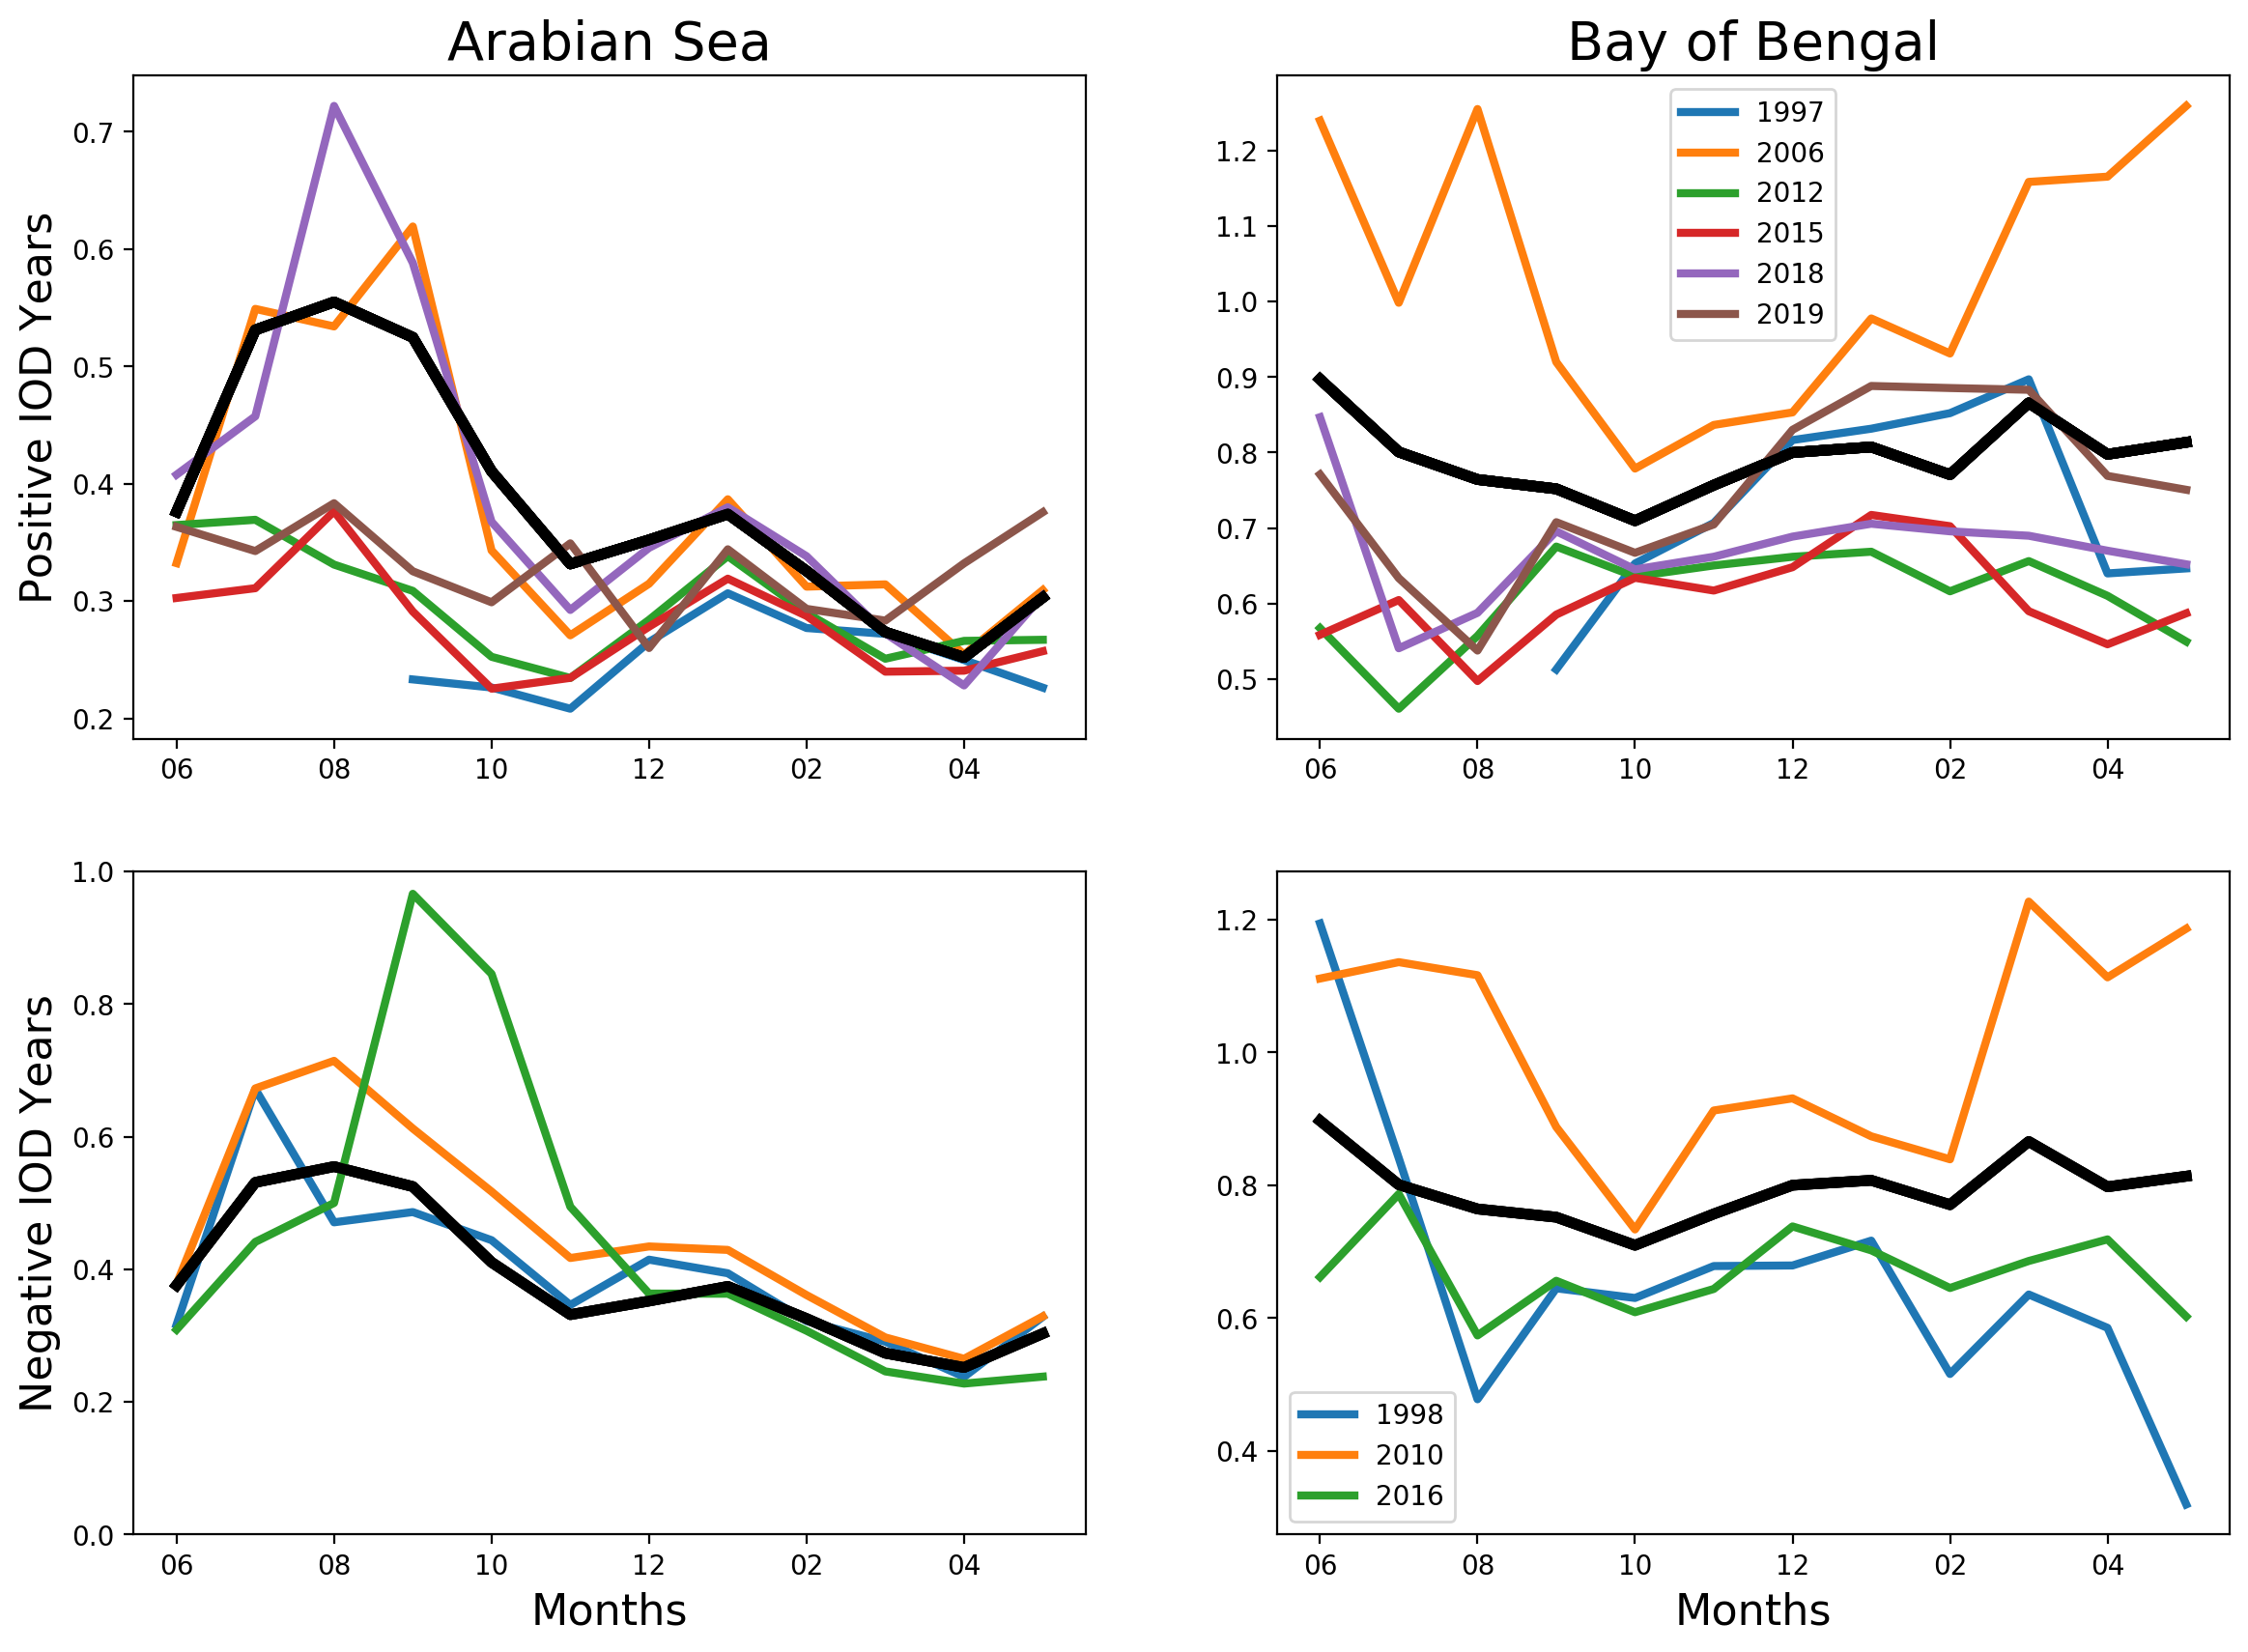

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(14,10), dpi = 200)

fsz = 16

for yy in range(len(posIODyears)):
    ax = axes[0,0]
    data = AS_posIOD_mon_chl[yy]
    
    if yy == 0:
        ax.plot(np.arange(3,12),data, linewidth = 3)
    else:
        ax.plot(data, linewidth = 3)
    ax.plot(AS_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[0,0])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.ylabel('Positive IOD Years', fontsize = fsz)
    plt.title('Arabian Sea', fontsize = fsz+4)
    
    ax = axes[0,1]
    data = BoB_posIOD_mon_chl[yy]
    if yy == 0:
        ax.plot(np.arange(3,12),data, linewidth = 3,label = posIODyears[yy])
    else:
        ax.plot(data, linewidth = 3,label = posIODyears[yy])
    ax.plot(BoB_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[0,1])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.legend()
    plt.title('Bay of Bengal', fontsize = fsz+4)
    
for yy in range(len(negIODyears)):
    ax = axes[1,0]
    data = AS_negIOD_mon_chl[yy]
    ax.plot(data, linewidth = 3)
    ax.plot(AS_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[1,0])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.xlabel('Months', fontsize = fsz)
    plt.ylabel('Negative IOD Years', fontsize = fsz)
    plt.ylim([0,1])
    
    ax = axes[1,1]
    data = BoB_negIOD_mon_chl[yy]
    ax.plot(data, linewidth = 3,label = negIODyears[yy])
    ax.plot(BoB_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[1,1])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.legend()
    plt.xlabel('Months', fontsize = fsz)


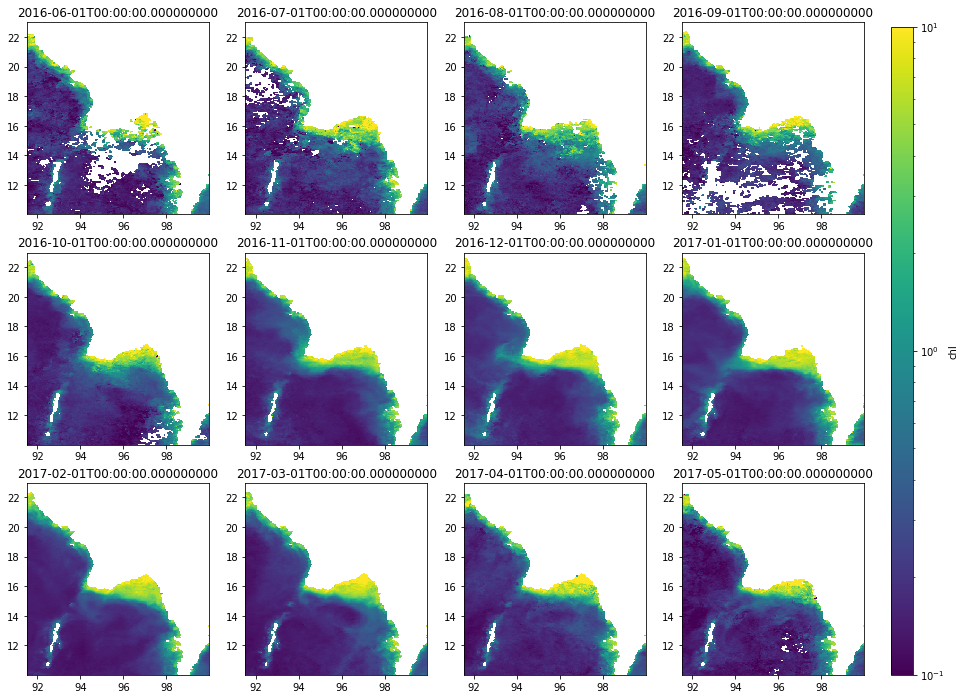

In [8]:
tt = 2
cmin = 0.1
cmax = 10
lon = BoB_negIOD_mon_chl_sp[tt].lon
lat = BoB_negIOD_mon_chl_sp[tt].lat

xx,yy = np.meshgrid(lon,lat)
data = BoB_negIOD_mon_chl_sp[tt]

fig, axs = plt.subplots(3,4, figsize=(15, 12), facecolor='w', edgecolor='k')

axs = axs.ravel()

for mm in range(12):
    
    p =axs[mm].pcolor(xx,yy,data[mm], norm = mpl.colors.LogNorm(vmin = cmin, vmax = cmax))
    axs[mm].set_title(np.array(data.time[mm]))
    
cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04)
cbar.set_label('chl')


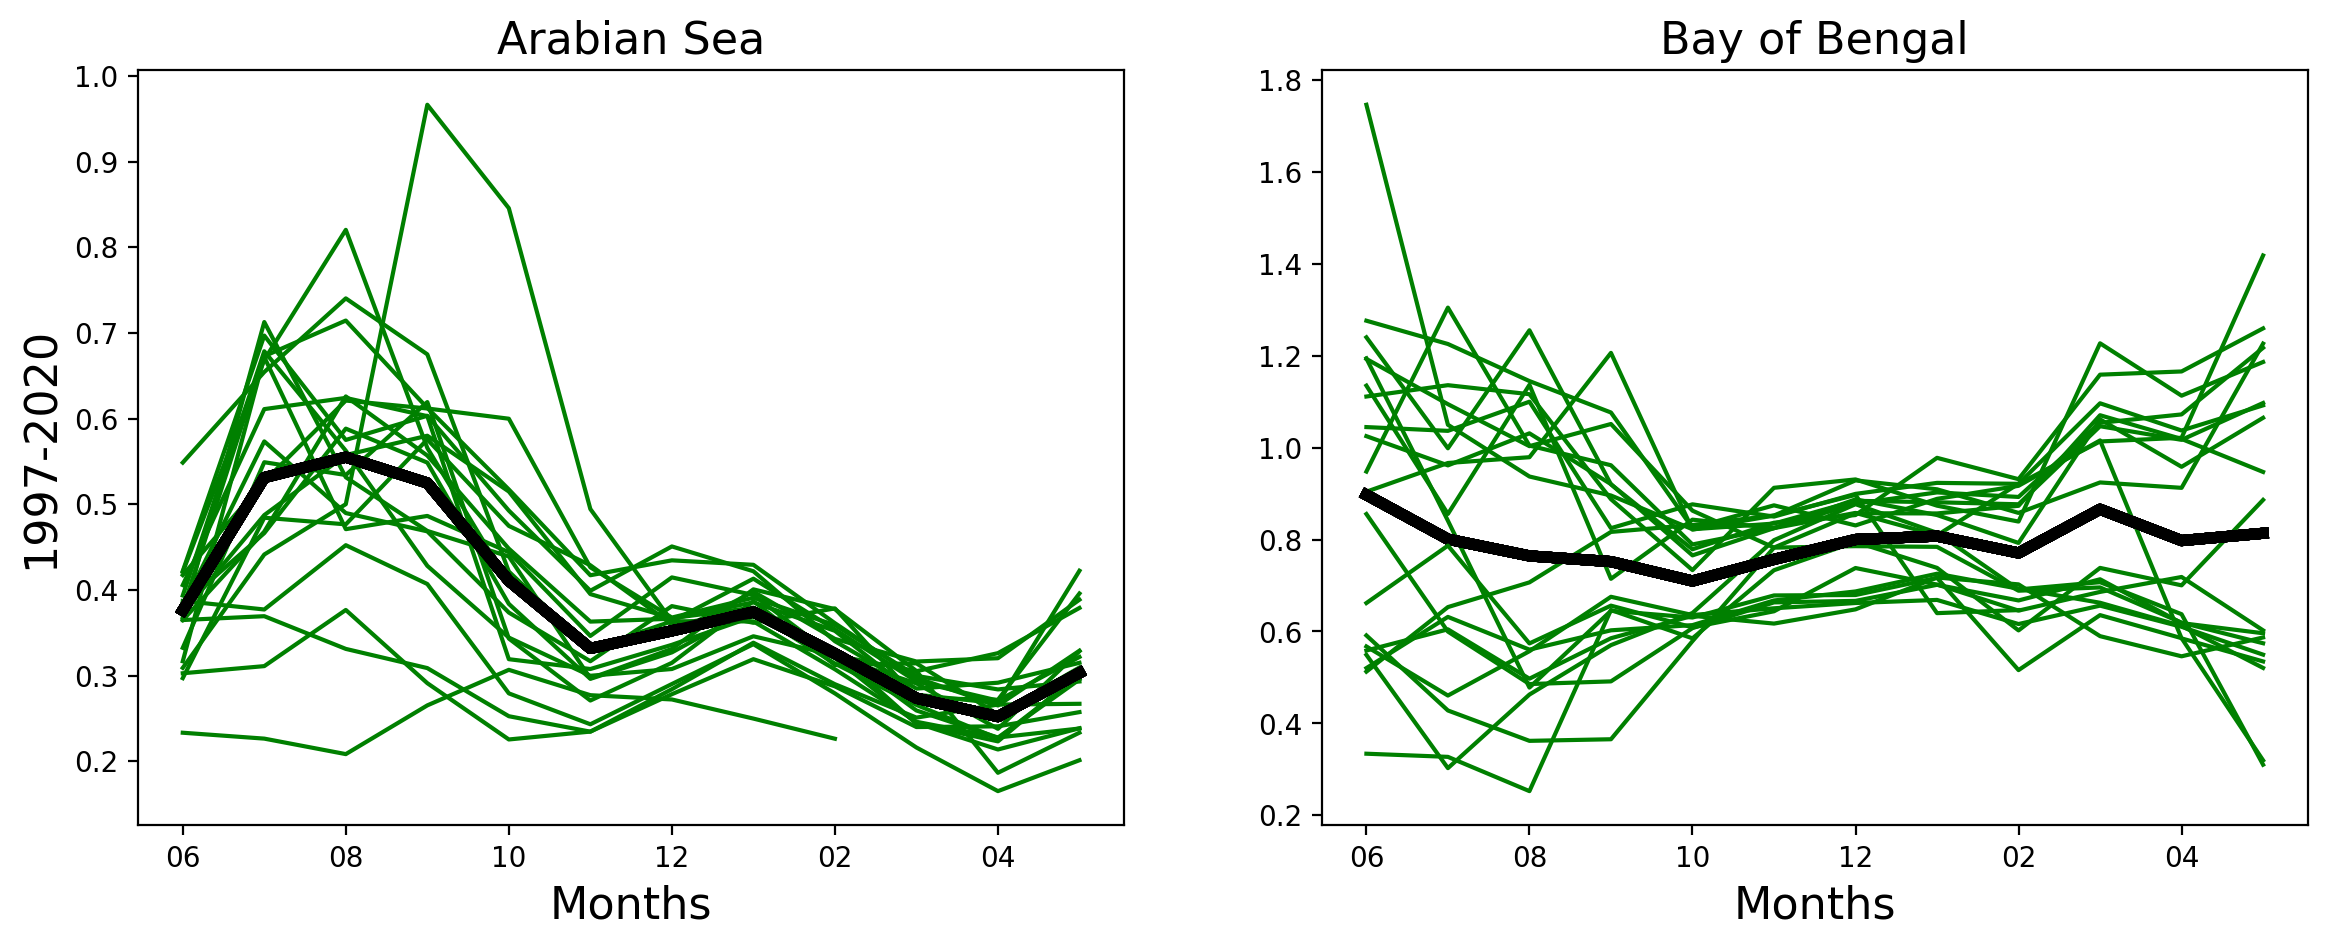

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(14,5), dpi = 200)


for yy in range(len(allyears)-3):
    ax = axes[0]
    data = AS_clim_mon_chl[yy]
    ax.plot(data, 'g')
    ax.plot(AS_clim_mon_chl_mean, 'k', linewidth = 4)
    ax.set_title('Arabian Sea', fontsize = fsz)
    ax.set_ylabel('1997-2020', fontsize = fsz)
    ax.set_xlabel('Months', fontsize = fsz)
    plt.sca(axes[0])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    
    ax = axes[1]
    data = BoB_clim_mon_chl[yy]
    ax.plot(BoB_clim_mon_chl_mean, 'k', linewidth = 4)
    ax.plot(data, 'g')
    ax.plot(BoB_clim_mon_chl_mean, 'k')
    
    ax.set_title('Bay of Bengal', fontsize = fsz)
    ax.set_xlabel('Months', fontsize = fsz)
    plt.sca(axes[1])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))


In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(14,14), dpi = 200)


for yy in range(len(posIODyears)):
    ax = axes[0,0]
    data = AS_posIOD_mon_chl[yy]
    
    if yy == 0:
        ax.plot(np.arange(3,12),data, linewidth = 3)
    else:
        ax.plot(data, linewidth = 3)
    ax.plot(AS_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[0,0])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.ylabel('Positive IOD Years')
    
    ax = axes[0,1]
    data = BoB_posIOD_mon_chl[yy]
    if yy == 0:
        ax.plot(np.arange(3,12),data, linewidth = 3,label = posIODyears[yy])
    else:
        ax.plot(data, linewidth = 3,label = posIODyears[yy])
    ax.plot(BoB_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[0,1])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.legend()
    plt.ylabel('Negative IOD Years')
    
for yy in range(len(negIODyears)):
    ax = axes[1,0]
    data = AS_negIOD_mon_chl[yy]
    ax.plot(data, linewidth = 3)
    ax.plot(AS_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[1,0])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.xlabel('Months')
    
    ax = axes[1,1]
    data = BoB_negIOD_mon_chl[yy]
    ax.plot(data, linewidth = 3,label = negIODyears[yy])
    ax.plot(BoB_clim_mon_chl_mean, 'k', linewidth = 4)
    plt.sca(axes[1,1])
    plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
    plt.legend()
    plt.xlabel('Months')



In [ ]:
# end new code

In [ ]:
# subset AS
lat_slice = slice(AS_bounds[2],AS_bounds[3]) 
lon_slice = slice(AS_bounds[0],AS_bounds[1]) 

AS_posIOD_anom = posIOD_mon_chl_mon_anom_mean.sel(lat=lat_slice,lon=lon_slice)
AS_posIOD = posIOD_mon_chl_mean.sel(lat=lat_slice,lon=lon_slice)

AS_negIOD_anom = negIOD_mon_chl_mon_anom_mean.sel(lat=lat_slice,lon=lon_slice)
AS_negIOD = negIOD_mon_chl_mean.sel(lat=lat_slice,lon=lon_slice)

AS_neuIOD = neuIOD_mon_chl_mean.sel(lat=lat_slice,lon=lon_slice)

AS_chl_clim = chl_mon_clim.sel(lat=lat_slice,lon=lon_slice)
AS_chl_clim = AS_chl_clim.roll(month=-5,roll_coords = False)

xx,yy = np.meshgrid(np.array(AS_posIOD_anom.lon),np.array(AS_posIOD_anom.lat))
AS_xx = xx.flatten()
AS_yy = yy.flatten()

AS_mask = mask_coast(AS_xx,AS_yy,[35,120,-20,30])

# subset BoB
lat_slice = slice(BoB_bounds[2],BoB_bounds[3]) 
lon_slice = slice(BoB_bounds[0],BoB_bounds[1]) 

BoB_posIOD_anom = posIOD_mon_chl_mon_anom_mean.sel(lat=lat_slice,lon=lon_slice)
BoB_posIOD= posIOD_mon_chl_mean.sel(lat=lat_slice,lon=lon_slice)

BoB_negIOD_anom = negIOD_mon_chl_mon_anom_mean.sel(lat=lat_slice,lon=lon_slice)
BoB_negIOD = negIOD_mon_chl_mean.sel(lat=lat_slice,lon=lon_slice)

BoB_neuIOD = neuIOD_mon_chl_mean.sel(lat=lat_slice,lon=lon_slice)

BoB_chl_clim = chl_mon_clim.sel(lat=lat_slice,lon=lon_slice)
BoB_chl_clim = BoB_chl_clim.roll(month=-5,roll_coords = False)

xx,yy = np.meshgrid(np.array(BoB_posIOD_anom.lon),np.array(BoB_posIOD_anom.lat))
BoB_xx = xx.flatten()
BoB_yy = yy.flatten()

BoB_mask = mask_coast(BoB_xx,BoB_yy,[35,120,-20,30])

In [ ]:
AS_posIOD_chl = np.full(12,np.nan)
AS_posIOD_chla_anom = np.full(12,np.nan)
AS_posIOD_chla_anom_test = np.full(12,np.nan)
AS_negIOD_chl = np.full(12,np.nan)
AS_negIOD_chla_anom = np.full(12,np.nan)
AS_negIOD_chla_anom_test = np.full(12,np.nan)

AS_neuIOD_chl = np.full(12,np.nan)

AS_posIOD_chla_anom_xy = np.full([12,len(AS_mask[AS_mask])],np.nan)
AS_negIOD_chla_anom_xy = np.full([12,len(AS_mask[AS_mask])],np.nan)

AS_clim_chl = np.full(12,np.nan)

for tt in range(12):
    
    # pos anomaly
    tmp = np.array(AS_posIOD_anom[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[AS_mask]
    AS_posIOD_chla_anom_xy[tt,:] = tmp
    AS_posIOD_chla_anom[tt] = np.nanmean(tmp)
    
    # pos anom test
    tmp1 = np.array(AS_posIOD[tt,:,:])
    tmp1 = tmp1.flatten()
    tmp1 = tmp1[AS_mask]
    
    tmp2 = np.array(AS_chl_clim[tt,:,:])
    tmp2 = tmp2.flatten()
    tmp2 = tmp2[AS_mask]
    
    AS_posIOD_chla_anom_test[tt] = np.nanmean(tmp1-tmp2)
    
    # pos total
    tmp = np.array(AS_posIOD[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[AS_mask]
    AS_posIOD_chl[tt] = np.nanmean(tmp)
    
    # neg anomaly
    tmp = np.array(AS_negIOD_anom[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[AS_mask]
    AS_negIOD_chla_anom_xy[tt,:] = tmp
    AS_negIOD_chla_anom[tt] = np.nanmean(tmp)
    
    # neg anom test
    tmp1 = np.array(AS_negIOD[tt,:,:])
    tmp1 = tmp1.flatten()
    tmp1 = tmp1[AS_mask]
    
    tmp2 = np.array(AS_chl_clim[tt,:,:])
    tmp2 = tmp2.flatten()
    tmp2 = tmp2[AS_mask]
    
    AS_negIOD_chla_anom_test[tt] = np.nanmean(tmp1-tmp2)
    
    # neg total
    tmp = np.array(AS_negIOD[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[AS_mask]
    AS_negIOD_chl[tt] = np.nanmean(tmp)
    
    # neu total
    tmp = np.array(AS_neuIOD[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[AS_mask]
    AS_neuIOD_chl[tt] = np.nanmean(tmp)
    
    
    # Climatology
    tmp = np.array(AS_chl_clim[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[AS_mask]
    AS_clim_chl[tt] = np.nanmean(tmp)


In [ ]:
BoB_posIOD_chl = np.full(12,np.nan)
BoB_posIOD_chla_anom = np.full(12,np.nan)
BoB_posIOD_chla_anom_test = np.full(12,np.nan)
BoB_negIOD_chl = np.full(12,np.nan)
BoB_negIOD_chla_anom = np.full(12,np.nan)
BoB_negIOD_chla_anom_test = np.full(12,np.nan)
len_test = []
clim_len_test = []
anom_len_test = []
BoB_neuIOD_chl = np.full(12,np.nan)

BoB_posIOD_chla_anom_xy = np.full([12,len(BoB_mask[BoB_mask])],np.nan)
BoB_negIOD_chla_anom_xy = np.full([12,len(BoB_mask[BoB_mask])],np.nan)

BoB_clim_chl = np.full(12,np.nan)

for tt in range(12):
    
    # pos anom
    tmp = np.array(BoB_posIOD_anom[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[BoB_mask]
    BoB_posIOD_chla_anom_xy[tt,:] = tmp
    BoB_posIOD_chla_anom[tt] = np.nanmean(tmp)
    anom_len_test.append(len(tmp[np.isnan(tmp)]))
    
    # pos anom test
    tmp1 = np.array(BoB_posIOD[tt,:,:])
    tmp1 = tmp1.flatten()
    tmp1 = tmp1[BoB_mask]
    
    tmp2 = np.array(BoB_chl_clim[tt,:,:])
    tmp2 = tmp2.flatten()
    tmp2 = tmp2[BoB_mask]
    
    BoB_posIOD_chla_anom_test[tt] = np.nanmean(tmp1-tmp2)
    
    
    # pos total
    tmp = np.array(BoB_posIOD[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[BoB_mask]
    BoB_posIOD_chl[tt] = np.nanmean(tmp)
    len_test.append(len(tmp[np.isnan(tmp)]))
    
    # neg anom
    tmp = np.array(BoB_negIOD_anom[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[BoB_mask]
    BoB_negIOD_chla_anom_xy[tt,:] = tmp
    BoB_negIOD_chla_anom[tt] = np.nanmean(tmp)
    
    # neg anom test
    tmp1 = np.array(BoB_negIOD[tt,:,:])
    tmp1 = tmp1.flatten()
    tmp1 = tmp1[BoB_mask]
    
    tmp2 = np.array(BoB_chl_clim[tt,:,:])
    tmp2 = tmp2.flatten()
    tmp2 = tmp2[BoB_mask]
    
    BoB_negIOD_chla_anom_test[tt] = np.nanmean(tmp1-tmp2)
    
    # neg total
    tmp = np.array(BoB_negIOD[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[BoB_mask]
    BoB_negIOD_chl[tt] = np.nanmean(tmp)
    
    # neu total
    tmp = np.array(BoB_neuIOD[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[BoB_mask]
    BoB_neuIOD_chl[tt] = np.nanmean(tmp)
    
    
    tmp = np.array(BoB_chl_clim[tt,:,:])
    tmp = tmp.flatten()
    tmp = tmp[BoB_mask]
    BoB_clim_chl[tt] = np.nanmean(tmp)
    clim_len_test.append(len(tmp[np.isnan(tmp)]))



In [ ]:
len_test

In [ ]:
clim_len_test

In [ ]:
anom_len_test

In [ ]:
test = np.array(BoB_posIOD_chla_anom[0])
test = len(test[np.isnan(test)])
test

In [ ]:
BoB_posIOD_chla_anom[0]

In [ ]:
test = np.array(BoB_clim_chl[0])
test = len(test[np.isnan(test)])
test

In [ ]:
len(BoB_chl_clim[0])

In [ ]:
fig = plt.figure(figsize=(8,4),dpi=200,constrained_layout=True)

gs = fig.add_gridspec(2,4, width_ratios = [1,.75,.75,1] )
sz = 0.1
cmin = -0.1
cmax = 0.1
cmap = plt.cm.coolwarm

plt.rcParams.update({'font.size': 8, 'lines.linewidth':2})
title = ['Arabian Sea','Annual Mean Interannual Anomaly','Bay of Bengal']
ylabel = ['Positive IOD Years', 'Negative IOD Years']

levels = np.linspace(-0.15,0.15,25)


##############################################################

ax = fig.add_subplot(gs[0, 0])
total = AS_posIOD_chl*len(posIODyears) + AS_negIOD_chl*len(negIODyears)+ AS_neuIOD_chl*len(neuIODyears)
total = total/(len(posIODyears)+len(negIODyears)+len(neuIODyears))
ax.plot(AS_posIOD_chl, color = 'k', label = 'Observed Cycle');
ax.plot(AS_clim_chl, color = 'g', label = 'Climatology' );
# ax.plot(total, color = 'm');
ax.plot(AS_posIOD_chl-AS_clim_chl,'kx', label = 'difference 1');
ax.plot(AS_posIOD_chla_anom_test,'mx', label = 'difference test');
ax.plot(AS_posIOD_chla_anom, color = 'm', label = 'Anomaly');
ax.plot(AS_neuIOD_chl, 'gx', label = 'Neutral');
ax.axhline(color = 'k', linewidth = 1)
plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
ax.set_title(title[0])
ax.set_ylabel(ylabel[0])
plt.legend()
plt.ylim([-1,1.5])

ax = fig.add_subplot(gs[0, 1:3],projection= ccrs.PlateCarree())
p = ax.scatter(AS_xx[AS_mask],AS_yy[AS_mask],c = np.nanmean(AS_posIOD_chla_anom_xy,0),marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
p = ax.scatter(BoB_xx[BoB_mask],BoB_yy[BoB_mask],c = np.nanmean(BoB_posIOD_chla_anom_xy,0),marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# c=ax.contour(ds_SLA.lon,ds_SLA.lat,posIOD_sla_mean, colors = 'black',
#           levels = levels)
ax.clabel(c, c.levels, inline=True, fontsize=10)

ax.set_title(title[1])
add_land(ax, cbounds)

ax = fig.add_subplot(gs[0, 3])
total = BoB_posIOD_chl*len(posIODyears) + BoB_negIOD_chl*len(negIODyears)+ BoB_neuIOD_chl*len(neuIODyears)
total = total/(len(posIODyears)+len(negIODyears)+len(neuIODyears))
ax.plot(BoB_posIOD_chl, color = 'k');
ax.plot(BoB_clim_chl, color = 'g');
ax.plot(BoB_posIOD_chl-BoB_clim_chl,'kx', label = 'difference 1');
ax.plot(BoB_posIOD_chla_anom_test,'mx', label = 'difference test');
ax.plot(BoB_posIOD_chla_anom, color = 'm');
ax.plot(BoB_neuIOD_chl,'gx');
ax.axhline(color = 'k', linewidth = 1)
plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
ax.set_title(title[2])
plt.ylim([-1,1.5])

ax = fig.add_subplot(gs[1, 0])
ax.plot(AS_negIOD_chl, color = 'k');
ax.plot(AS_clim_chl, color = 'g');
ax.plot(AS_negIOD_chl-AS_clim_chl,'kx', label = 'difference 1');
ax.plot(AS_negIOD_chla_anom_test,'mx', label = 'difference test');
ax.plot(AS_negIOD_chla_anom, color = 'm');
ax.plot(AS_neuIOD_chl,'gx');
ax.axhline(color = 'k', linewidth = 1)
plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
ax.set_ylabel(ylabel[1])
plt.ylim([-1,1.5])

ax = fig.add_subplot(gs[1, 1:3],projection= ccrs.PlateCarree())
p = ax.scatter(AS_xx[AS_mask],AS_yy[AS_mask],c = np.nanmean(AS_negIOD_chla_anom_xy,0),marker='s',s= sz,
                      cmap=cmap,vmin= cmin, vmax = cmax,transform=ccrs.PlateCarree())
p = ax.scatter(BoB_xx[BoB_mask],BoB_yy[BoB_mask],c = np.nanmean(BoB_negIOD_chla_anom_xy,0),marker='s',s= sz,
                      cmap=cmap,vmin= cmin, vmax = cmax,transform=ccrs.PlateCarree())
# c=ax.contour(ds_SLA.lon,ds_SLA.lat,negIOD_sla_mean, colors = 'black',
#           levels = levels)
ax.clabel(c, c.levels, inline=True, fontsize=10)
add_land(ax, cbounds)

ax = fig.add_subplot(gs[1, 3])
ax.plot(BoB_negIOD_chl, color = 'k');
ax.plot(BoB_neuIOD_chl, 'gx');
ax.plot(BoB_clim_chl, color = 'g');
ax.plot(BoB_negIOD_chl-BoB_clim_chl,'kx', label = 'difference 1');
ax.plot(BoB_negIOD_chla_anom_test,'mx', label = 'difference test');
ax.plot(BoB_negIOD_chla_anom, color = 'm');
ax.axhline(color = 'k', linewidth = 1)
plt.xticks(np.arange(0,12,2), ('06','08','10','12','02','04'))
plt.ylim([-0.5,1.5])

cbar_ax = fig.add_axes([0.15, -0.1, 0.75, 0.02])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal')
cbar.set_label('Chlorophyll-a Anomaly ($mg/m^3$)')





In [ ]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p = BoB_chl_mon_clim.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=cmocean.cm.tarn,
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Chlorophyll"},
                                        norm = LogNorm(vmax=2,vmin=0.001),
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

In [ ]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p = AS_chl_mon_clim.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=cmocean.cm.tarn,
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Chlorophyll"},
                                        norm = LogNorm(vmax=2,vmin=0.001),
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

In [ ]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = posIOD_mon_chl_mon_anom_mean.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=plt.cm.PRGn,
                                        vmax=.25,vmin=-.25, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Surface Temperature (C)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

In [ ]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = negIOD_mon_chl_mon_anom_mean.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=plt.cm.PRGn,
                                        vmax=.25,vmin=-.25, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Surface Temperature (C)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

In [ ]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = negIOD_mon_chl_mean.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=plt.cm.PRGn,
                                        vmax=1,vmin=0, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Surface Temperature (C)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

In [ ]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = posIOD_mon_chl_mean.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=plt.cm.PRGn,
                                        vmax=1,vmin=0, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Surface Temperature (C)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')

In [ ]:
months = ['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']

p = neuIOD_mon_chl_mon_anom_mean.plot.pcolormesh(x="lon", y="lat", col="month", col_wrap=3,
                                        cmap=plt.cm.PRGn,
                                        vmax=.25,vmin=-.25, # set colorbar lims
                                        extend = 'neither', # make a box colorbar rather than pointed
                                        figsize = (12, 12),
                                        cbar_kwargs={"label": "Sea Surface Temperature (C)"},
                                        subplot_kws={'facecolor': 'gray'}
                                       )

for i, ax in enumerate(p.axes.flat):
    ax.set_title(months[i])
    ax.axes.axis('tight')
#     plt.subplots_adjust(top=.9)

p.set_xlabels('Longitude')
p.set_ylabels('Latitude')